In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.utils import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')
Y_train = data_train['label'].values

In [3]:
X_train = data_train.loc[:,'pixel0':'pixel783'].values
X_train = np.array(X_train)
X_train = X_train.reshape([-1,28,28,1])
Y_train = Y_train.reshape([-1,1])
print(X_train.shape)
print(Y_train.shape)

(42000, 28, 28, 1)
(42000, 1)


In [4]:
X_test = data_test.loc[:,'pixel0':'pixel783'].values
X_test = np.array(X_test)
X_test = X_test.reshape([-1,28,28,1])
print(X_test.shape)

(28000, 28, 28, 1)


In [5]:
X_train = X_train/255
X_test = X_test/255
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = random_seed)

In [6]:
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
print(Y_train.shape)

(37800, 10)


In [7]:
inputs = Input(shape = (28,28,1))
conv0 = Conv2D(64, 3, padding = 'same', activation = 'relu')(inputs)
conv1 = Conv2D(64, 3, padding='same', activation='relu')(conv0)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(10, activation='softmax')(dense2)

model1 = Model(input = inputs, output = dense3)
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 256)       819456    
__________

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *

In [9]:
datagen = ImageDataGenerator(rotation_range = 10, zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1)
datagen.fit(X_train)

In [10]:
model1.compile(Adam(lr = 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=3)

In [12]:
history = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 200), epochs = 40, steps_per_epoch = 189, validation_data = (X_val, Y_val), callbacks = [reduce_lr])

Epoch 1/40
189/189 [==============================] - 34s 182ms/step - loss: 0.3848 - acc: 0.8695 - val_loss: 0.0525 - val_acc: 0.9840
Epoch 2/40
189/189 [==============================] - 30s 159ms/step - loss: 0.0699 - acc: 0.9789 - val_loss: 0.0538 - val_acc: 0.9848
Epoch 3/40
189/189 [==============================] - 30s 159ms/step - loss: 0.0516 - acc: 0.9847 - val_loss: 0.0335 - val_acc: 0.9921
Epoch 4/40
189/189 [==============================] - 30s 159ms/step - loss: 0.0415 - acc: 0.9871 - val_loss: 0.0232 - val_acc: 0.9931
Epoch 5/40
189/189 [==============================] - 30s 159ms/step - loss: 0.0362 - acc: 0.9892 - val_loss: 0.0195 - val_acc: 0.9933
Epoch 6/40
189/189 [==============================] - 30s 159ms/step - loss: 0.0313 - acc: 0.9908 - val_loss: 0.0217 - val_acc: 0.9940
Epoch 7/40
189/189 [==============================] - 30s 159ms/step - loss: 0.0268 - acc: 0.9923 - val_loss: 0.0197 - val_acc: 0.9945
Epoch 8/40
189/189 [==============================] - 3

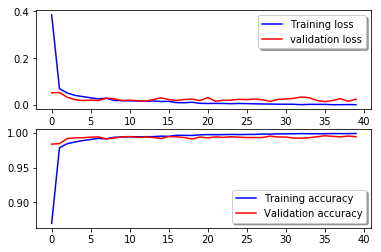

In [13]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [14]:
ans = model1.predict(x = X_test, verbose = 1)

28000/28000 [==============================] - 12s 416us/step


In [15]:
ans = np.argmax(ans, axis =1)

In [16]:
print(ans)

[2 0 9 ... 3 9 2]


In [17]:
ans = pd.Series(ans, name = 'Label')
index = pd.Series(range(1,28001), name = 'ImageID')
submission = pd.concat([index, ans], axis = 1)

In [18]:
submission.to_csv("cnn_mnist.csv",index=False)